# Requirements

In [30]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import wandb

sns.set_theme(
    style="whitegrid", 
    font_scale = 2, 
    rc={'figure.figsize':(18,9)}
)

## scripts for loading data from WandB

In [31]:
def load_normal(proj_name):

    api = wandb.Api()
    # Project is specified by <entity/project-name>
    runs = api.runs(f"pavalipopov/{proj_name}")

    summary_list = []
    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)


    AUC_score = []
    accuracy = []

    for run in summary_list:
        AUC_score.append(run["test_score"])
        accuracy.append(run["test_accuracy"])
    
    return AUC_score, accuracy


def load_milc(proj_name):
    api = wandb.Api()
    # Project is specified by <entity/project-name>
    runs = api.runs(f"pavalipopov/{proj_name}")

    summary_list = []
    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)


    AUC_score = []
    accuracy = []

    for run in summary_list:
        AUC_score.append(run["train_score"])
        accuracy.append(run["train_accuracy"])
    
    return AUC_score, accuracy

def load_bnt(proj_name):
    api = wandb.Api()
    # Project is specified by <entity/project-name>
    runs = api.runs(f"pavalipopov/{proj_name}")

    summary_list = []
    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)


    AUC_score = []
    accuracy = []

    for run in summary_list:
        AUC_score.append(run["Test AUC"])
        accuracy.append(run["Test Accuracy"])
    
    return AUC_score, accuracy

In [32]:
def load_metrics(paths_dict, ds_dict, model_dict):
    data_list = []

    for model_name in paths_dict.keys():
        print(model_name)
        for dataset_name in paths_dict[model_name].keys():
            print("\t ", dataset_name)
            if model_name in ["milc", "npt_milc"]:
                auc, acc = load_milc(paths_dict[model_name][dataset_name])
            elif model_name == "bnt":
                auc, acc = load_bnt(paths_dict[model_name][dataset_name])
            else:
                auc, acc = load_normal(paths_dict[model_name][dataset_name])
            
            data_list.append(
                pd.DataFrame(
                    {
                        "AUC": auc,
                        "Accuracy": acc,
                        "Model": [model_dict[model_name]]*len(auc),
                        "Dataset": [ds_dict[dataset_name]]*len(auc),
                    }
                )
            )
    
    return pd.concat(data_list)

# Plot figures

## All wandb projects

In [35]:
projects = {
    "mlp": {
        "fbirn": "220827.011216-experiment-mlp-fbirn-tests-cobre_bsnip_abide",
        "fbirn_100": "221018.212243-experiment-mlp-fbirn_100",
        "fbirn_200": "221018.220806-experiment-mlp-fbirn_200",
        "fbirn_400": "221018.230636-experiment-mlp-fbirn_400",
        "fbirn_1000": "221019.012758-experiment-mlp-fbirn_1000",
        "bsnip": "220827.012730-experiment-mlp-bsnip-tests-fbirn_cobre",
        "cobre": "220827.014957-experiment-mlp-cobre-tests-fbirn_bsnip",

        "abide": "220811.190848-experiment-mlp-abide",
        "abide_869": "220811.221744-experiment-mlp-abide_869",
        "abide_roi": "221019.144727-experiment-mlp-abide_roi",

        "oasis": "220811.052827-experiment-mlp-oasis",

        "hcp": "221021.065816-experiment-mlp-hcp",
        "hcp_roi": "221019.112734-experiment-mlp-hcp_roi",
        "ukb": "123-experiment-mlp-ukb", # 20 trials per fold

        "time_fbirn": "220930.164853-experiment-mlp-time_fbirn"
    },
    "new_attention_mlp": {
        "fbirn": "220817.041043-experiment-new_attention_mlp-fbirn",
        # "fbirn_100": "",
        # "fbirn_200": "",
        # "fbirn_400": "",
        # "fbirn_1000": "",
        "bsnip": "220830.041453-experiment-new_attention_mlp-bsnip",
        "cobre": "220830.025754-experiment-new_attention_mlp-cobre",

        "abide": "220817.033648-experiment-new_attention_mlp-abide",
        "abide_869": "220817.052433-experiment-new_attention_mlp-abide_869",
        # "abide_roi": "ABIDE1 Schaefer 200 871 subjects",

        "oasis": "220817.022010-experiment-new_attention_mlp-oasis",

        # "hcp": "HCP ICA",
        # "hcp_roi": "HCP Schaefer 200",
        # "ukb": "UK Biobank ICA",

        # "time_fbirn": "FBIRN ICA Normal/Time-inversed",
    },
    "lstm": {
        "fbirn": "220817.225007-experiment-lstm-fbirn",
        "fbirn_100": "221021.183513-experiment-lstm-fbirn_100",
        "fbirn_200": "221022.012316-experiment-lstm-fbirn_200",
        "fbirn_400": "221022.062133-experiment-lstm-fbirn_400",
        "fbirn_1000": "221023.065038-experiment-lstm-fbirn_1000",
        "bsnip": "220831.003802-experiment-lstm-bsnip",
        "cobre": "220830.080927-experiment-lstm-cobre",

        "abide": "220817.131942-experiment-lstm-abide",
        "abide_869": "220820.205431-experiment-lstm-abide_869",
        "abide_roi": "221112.070301-experiment-lstm-abide_roi",

        "oasis": "220817.085028-experiment-lstm-oasis",

        "hcp": "221105.181412-experiment-lstm-hcp",
        "hcp_roi": "221120.234951-experiment-lstm-hcp_roi",
        # "ukb": "UK Biobank ICA",

        # "time_fbirn": "FBIRN ICA Normal/Time-inversed",
    },
    "noah_lstm": {
        "fbirn": "noah-experiment-noah_lstm-fbirn-tests-cobre_bsnip",
        # "fbirn_100": "FBIRN Schaefer 100", missing
        "fbirn_200": "221205.034306-experiment-noah_lstm-fbirn_200",
        "fbirn_400": "221205.081048-experiment-noah_lstm-fbirn_400",
        "fbirn_1000": "221205.130240-experiment-noah_lstm-fbirn_1000",
        "bsnip": "221130.135936-experiment-noah_lstm-bsnip",
        "cobre": "221130.035131-experiment-noah_lstm-cobre",

        "abide": "221201.162150-experiment-noah_lstm-abide",
        "abide_869": "221202.151953-experiment-noah_lstm-abide_869",
        # "abide_roi": "ABIDE1 Schaefer 200 871 subjects",

        "oasis": "221201.063417-experiment-noah_lstm-oasis",

        # "hcp": "HCP ICA", unfinished 221203.022937-tune-noah_lstm-hcp 
        # "hcp_roi": "HCP Schaefer 200",
        # "ukb": "UK Biobank ICA",

        "time_fbirn": "221202.210902-experiment-noah_lstm-time_fbirn"
    },
    "transformer": {
        "fbirn": "220826.185919-experiment-transformer-fbirn",
        "fbirn_100": "221023.063324-experiment-transformer-fbirn_100",
        "fbirn_200": "221023.101246-experiment-transformer-fbirn_200",
        "fbirn_400": "221023.144808-experiment-transformer-fbirn_400",
        "fbirn_1000": "221023.234336-experiment-transformer-fbirn_1000",
        "bsnip": "220901.064229-experiment-transformer-bsnip",
        "cobre": "220831.224232-experiment-transformer-cobre",

        "abide": "220826.154213-experiment-transformer-abide",
        "abide_869": "220826.214154-experiment-transformer-abide_869",
        "abide_roi": "221125.233050-experiment-transformer-abide_roi",

        "oasis": "220825.183225-experiment-transformer-oasis",
        
        "hcp": "221104.174018-experiment-transformer-hcp",
        "hcp_roi": "221118.092524-experiment-transformer-hcp_roi",
        # "ukb": "UK Biobank ICA",

        # "time_fbirn": "FBIRN ICA Normal/Time-inversed",
    },
    "mean_transformer": {
        "fbirn": "mean_transformer-experiment-mean_transformer-fbirn-tests-cobre_bsnip",
        # "fbirn_100": "FBIRN Schaefer 100",
        # "fbirn_200": "FBIRN Schaefer 200",
        # "fbirn_400": "FBIRN Schaefer 400",
        # "fbirn_1000": "FBIRN Schaefer 1000",
        # "bsnip": "BSNIP ICA",
        # "cobre": "COBRE ICA",

        # "abide": "ABIDE1 ICA 569 subjects",
        # "abide_869": "ABIDE1 ICA 869 subjects",
        # "abide_roi": "ABIDE1 Schaefer 200 871 subjects",

        # "oasis": "OASIS3 ICA",

        # "hcp": "HCP ICA",
        # "hcp_roi": "HCP Schaefer 200",
        # "ukb": "UK Biobank ICA",

        # "time_fbirn": "FBIRN ICA Normal/Time-inversed"
    },
    "milc": {
        "fbirn": "newer-experiment-milc-fbirn", # has cross-datasets
        # "fbirn_100": "FBIRN Schaefer 100",
        # "fbirn_200": "FBIRN Schaefer 200",
        # "fbirn_400": "FBIRN Schaefer 400",
        # "fbirn_1000": "FBIRN Schaefer 1000",
        "bsnip": "newer-experiment-milc-bsnip", # has cross-datasets
        "cobre": "newer-experiment-milc-cobre", # has cross-datasets

        "abide": "new-experiment-milc-abide",
        "abide_869": "new-experiment-milc-abide_869",
        # "abide_roi": "ABIDE1 Schaefer 200 871 subjects",

        "oasis": "new-experiment-milc-oasis",

        # "hcp": "HCP ICA",
        # "hcp_roi": "HCP Schaefer 200",
        # "ukb": "UK Biobank ICA",

        # "time_fbirn": "FBIRN ICA Normal/Time-inversed",
    },
    "npt_milc": {
        "fbirn": "NPT-experiment-npt_milc-fbirn", # has cross-datasets
        # "fbirn_100": "FBIRN Schaefer 100",
        # "fbirn_200": "FBIRN Schaefer 200",
        # "fbirn_400": "FBIRN Schaefer 400",
        # "fbirn_1000": "FBIRN Schaefer 1000",
        "bsnip": "NPT-experiment-npt_milc-bsnip", # has cross-datasets
        "cobre": "NPT-experiment-npt_milc-cobre", # has cross-datasets

        "abide": "NPT-experiment-npt_milc-abide",
        "abide_869": "NPT-experiment-npt_milc-abide_869",
        # "abide_roi": "ABIDE1 Schaefer 200 871 subjects",

        "oasis": "NPT-experiment-npt_milc-oasis",

        # "hcp": "HCP ICA",
        # "hcp_roi": "HCP Schaefer 200",
        # "ukb": "UK Biobank ICA",

        # "time_fbirn": "FBIRN ICA Normal/Time-inversed",
    },
    "stdim": {
        "fbirn": "221122.033457-experiment-stdim-fbirn",
        "fbirn_100": "221130.222055-experiment-stdim-fbirn_100",
        "fbirn_200": "221201.230541-experiment-stdim-fbirn_200",
        "fbirn_400": "221202.121629-experiment-stdim-fbirn_400",
        "fbirn_1000": "221203.035210-experiment-stdim-fbirn_1000",
        "bsnip": "221125.084205-experiment-stdim-bsnip",
        "cobre": "221126.015548-experiment-stdim-cobre",

        "abide": "221126.124710-experiment-stdim-abide",
        "abide_869": "221128.230604-experiment-stdim-abide_869",
        # "abide_roi": "ABIDE1 Schaefer 200 871 subjects",

        "oasis": "221123.193331-experiment-stdim-oasis",

        # "hcp": "HCP ICA",
        # "hcp_roi": "HCP Schaefer 200",
        # "ukb": "UK Biobank ICA",

        "time_fbirn": "221130.083802-experiment-stdim-time_fbirn",
    },
    "dice": {
        # "fbirn": "dice1-experiment-dice-fbirn", # incomplete
        "fbirn_100": "dice1-experiment-dice-fbirn_100",
        "fbirn_200": "dice1-experiment-dice-fbirn_200",
        # "fbirn_400": "FBIRN Schaefer 400",
        # "fbirn_1000": "FBIRN Schaefer 1000",
        "bsnip": "dice1-experiment-dice-bsnip",
        # "cobre": "dice1-experiment-dice-cobre", # incomplete

        "abide": "dice1-experiment-dice-abide",
        "abide_869": "dice1-experiment-dice-abide_869",
        # "abide_roi": "ABIDE1 Schaefer 200 871 subjects",

        "oasis": "dice1-experiment-dice-oasis",

        # "hcp": "HCP ICA",
        # "hcp_roi": "HCP Schaefer 200",
        # "ukb": "UK Biobank ICA",

        "time_fbirn": "dice1-experiment-dice-time_fbirn",
    },
    "bnt": {
        "fbirn": "fbirn_BrainNetworkTransformer_1.0_continus_mixup",
        # "fbirn_100": "FBIRN Schaefer 100",
        # "fbirn_200": "FBIRN Schaefer 200",
        # "fbirn_400": "FBIRN Schaefer 400",
        # "fbirn_1000": "FBIRN Schaefer 1000",
        "bsnip": "bsnip_BrainNetworkTransformer_1.0_continus_mixup",
        "cobre": "cobre_BrainNetworkTransformer_1.0_continus_mixup",

        "abide": "abide_BrainNetworkTransformer_1.0_continus_mixup",
        "abide_869": "abide_869_BrainNetworkTransformer_1.0_continus_mixup",
        # "abide_roi": "ABIDE1 Schaefer 200 871 subjects",

        "oasis": "oasis_BrainNetworkTransformer_1.0_continus_mixup",

        "hcp": "hcp_BrainNetworkTransformer_1.0_continus_mixup",
        # "hcp_roi": "HCP Schaefer 200",
        # "ukb": "UK Biobank ICA",

        "time_fbirn": "time_fbirn_BrainNetworkTransformer_1.0_continus_mixup",
    }
}

In [36]:
dataset_match = {
    "fbirn": "FBIRN ICA",
    "fbirn_100": "FBIRN Schaefer 100",
    "fbirn_200": "FBIRN Schaefer 200",
    "fbirn_400": "FBIRN Schaefer 400",
    "fbirn_1000": "FBIRN Schaefer 1000",
    "bsnip": "BSNIP ICA",
    "cobre": "COBRE ICA",

    "abide": "ABIDE1 ICA 569 subjects",
    "abide_869": "ABIDE1 ICA 869 subjects",
    "abide_roi": "ABIDE1 Schaefer 200 871 subjects",

    "oasis": "OASIS3 ICA",

    "hcp": "HCP ICA",
    "hcp_roi": "HCP Schaefer 200",
    "ukb": "UK Biobank ICA",

    "time_fbirn": "FBIRN ICA Normal/Time-inversed"
}

model_match = {
    "mlp": "MLP",
    "wide_mlp": "(wide) MLP",
    "deep_mlp": "(deep) MLP",
    "attention_mlp": "Simple Attention MLP",
    "new_attention_mlp": "Attention MLP",
    "lstm": "LSTM",
    "noah_lstm": "Mean LSTM",
    "transformer": "TF",
    "mean_transformer": "Mean TF",
    "milc": "MILC",
    "npt_milc": "MILC (NPT)",
    "stdim": "ST-DIM",
    "dice": "DICE",
    "bnt": "BNT"
}


In [34]:
data = load_metrics(projects, dataset_match, model_match)

mlp
	  fbirn
	  fbirn_100
	  fbirn_200
	  fbirn_400
	  fbirn_1000
	  bsnip
	  cobre
	  abide
	  abide_869
	  abide_roi
	  oasis
	  hcp
	  hcp_roi
	  ukb
	  time_fbirn
new_attention_mlp
	  fbirn
	  bsnip
	  cobre
	  abide
	  abide_869
	  oasis
lstm
	  fbirn
	  fbirn_100
	  fbirn_200
	  fbirn_400
	  fbirn_1000
	  bsnip
	  cobre
	  abide
	  abide_869
	  abide_roi
	  oasis
	  hcp
	  hcp_roi
noah_lstm
	  fbirn
	  fbirn_200
	  fbirn_400
	  fbirn_1000
	  bsnip
	  cobre
	  abide
	  abide_869
	  oasis
	  time_fbirn
transformer
	  fbirn
	  fbirn_100
	  fbirn_200
	  fbirn_400
	  fbirn_1000
	  bsnip
	  cobre
	  abide
	  abide_869
	  abide_roi
	  oasis
	  hcp
	  hcp_roi
mean_transformer
	  fbirn
milc
	  fbirn
	  bsnip
	  cobre
	  abide
	  abide_869
	  oasis
npt_milc
	  fbirn
	  bsnip
	  cobre
	  abide
	  abide_869
	  oasis
stdim
	  fbirn
	  fbirn_100
	  fbirn_200
	  fbirn_400
	  fbirn_1000
	  bsnip
	  cobre
	  abide
	  abide_869
	  oasis
	  time_fbirn
dice
	  fbirn_100
	  fbirn_200
	  bsnip
	  abid

In [39]:
fbirn_inv_data = data.query("Dataset in ('FBIRN ICA Normal/Time-inversed')")
fbirn_roi_data = data.query("Dataset in ('FBIRN Schaefer 100','FBIRN Schaefer 200','FBIRN Schaefer 400','FBIRN Schaefer 1000')")
f_b_c_data = data.query("Dataset in ('FBIRN ICA','BSNIP ICA','COBRE ICA')")
abide_data = data.query("Dataset in ('ABIDE1 ICA 569 subjects','ABIDE1 ICA 869 subjects','ABIDE1 Schaefer 200 871 subjects')")
oasis_data = data.query("Dataset in ('OASIS3 ICA')")
hcp_uk_data = data.query("Dataset in ('HCP ICA','HCP Schaefer 200','UK Biobank ICA')")

In [50]:
mlp_bnt_data = data.query("Model in ('MLP', 'BNT')")
mlp_bnt_data = mlp_bnt_data.query("Dataset in ('FBIRN ICA', 'BSNIP ICA', 'COBRE ICA', 'ABIDE1 ICA 569 subjects', 'ABIDE1 ICA 869 subjects', 'OASIS3 ICA', 'HCP ICA', 'FBIRN ICA Normal/Time-inversed')")

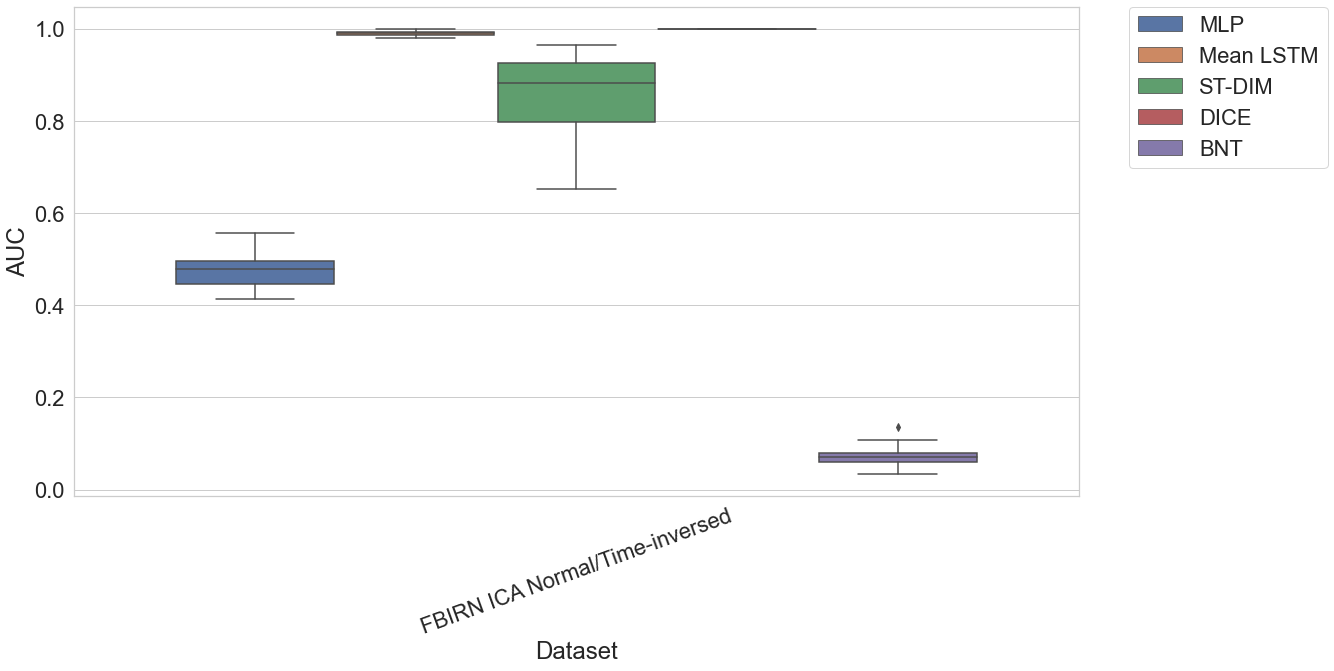

In [53]:
sns.boxplot(
    x="Dataset", 
    y="AUC",
    hue="Model",
    data=fbirn_inv_data
)
plt.xticks(rotation=20)
# sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

## All ICA data

In [ ]:
# WandB projects
proj_names = [
    #OASIS
    "220811.052827-experiment-mlp-oasis",
    "220817.022010-experiment-new_attention_mlp-oasis",
    "new-experiment-milc-oasis",
    "NPT-experiment-milc-oasis",
    "220817.085028-experiment-lstm-oasis",
    "220823.054741-experiment-another_lstm-oasis",
    "220825.183225-experiment-transformer-oasis",
    #ABIDE
    "220811.190848-experiment-mlp-abide",
    "220817.033648-experiment-new_attention_mlp-abide",
    "new-experiment-milc-abide",
    "220817.131942-experiment-lstm-abide",
    "220823.122916-experiment-another_lstm-abide",
    "220826.154213-experiment-transformer-abide",
    #Abide 869
    "220811.221744-experiment-mlp-abide_869",
    "220817.052433-experiment-new_attention_mlp-abide_869",
    "new-experiment-milc-abide_869",
    "220820.205431-experiment-lstm-abide_869",
    "220824.025849-experiment-another_lstm-abide_869",
    "220826.214154-experiment-transformer-abide_869",
    #FBIRN
    "220817.031422-experiment-mlp-fbirn",
    "220817.041043-experiment-new_attention_mlp-fbirn",
    "newer-experiment-milc-fbirn",
    "220817.225007-experiment-lstm-fbirn",
    "220823.220212-experiment-another_lstm-fbirn",
    "220826.185919-experiment-transformer-fbirn",
    "noah-experiment-noah_lstm-fbirn-tests-cobre_bsnip",
    "deep_noah-experiment-deep_noah_lstm-fbirn-tests-cobre_bsnip",
    "mean_transformer-experiment-mean_transformer-fbirn-tests-cobre_bsnip",
    #COBRE
    "220827.014957-experiment-mlp-cobre-tests-fbirn_bsnip",
    "220830.025754-experiment-new_attention_mlp-cobre",
    "newer-experiment-milc-cobre",
    "220830.080927-experiment-lstm-cobre",
    "220831.070739-experiment-another_lstm-cobre",
    "220831.224232-experiment-transformer-cobre",
    #BSNIP
    "220827.012730-experiment-mlp-bsnip-tests-fbirn_cobre",
    "220830.041453-experiment-new_attention_mlp-bsnip",
    "newer-experiment-milc-bsnip",
    "220831.003802-experiment-lstm-bsnip",
    "220831.123732-experiment-another_lstm-bsnip",
    "220901.064229-experiment-transformer-bsnip",
    #HCP
    "221021.065816-experiment-mlp-hcp",
    #UKB
    "123-experiment-mlp-ukb",
    # Time and time-inversed FBIRN
    "220930.164853-experiment-mlp-time_fbirn"
]

In [12]:
data = pd.read_csv("./plots_data/all_ICA_data.csv")

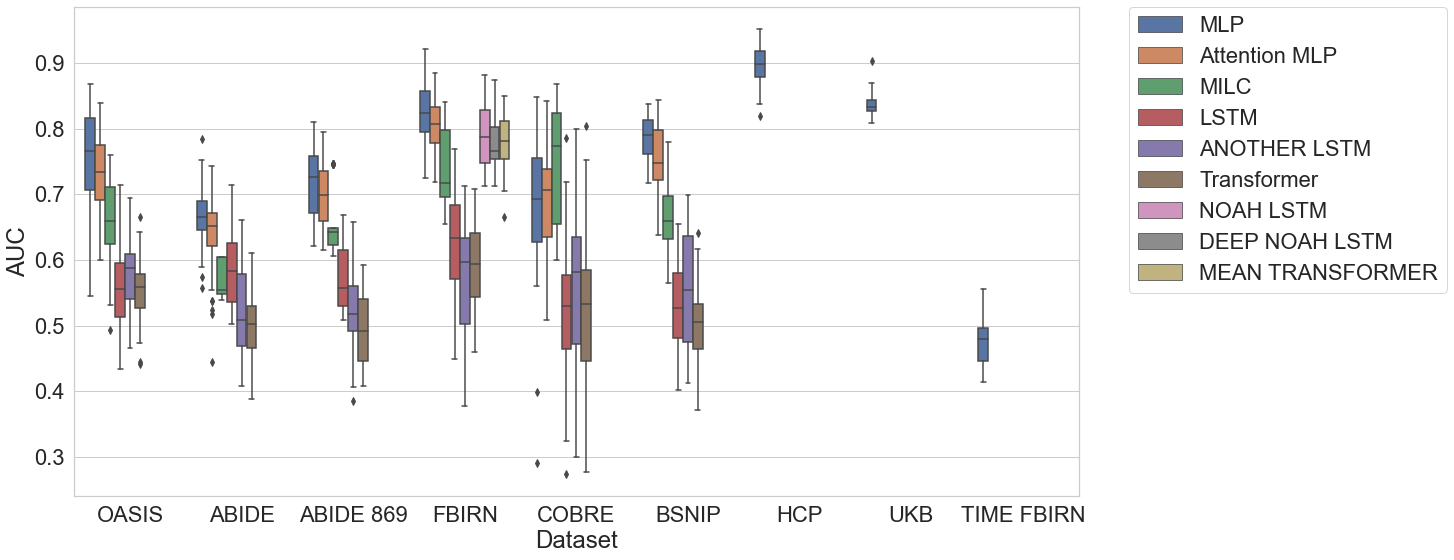

In [13]:
sns.boxplot(x="Dataset", y="AUC",
            hue="Model",
            data=data)
# sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig(
    "./images/all_auc.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)
plt.savefig(
    "./images/all_auc.svg",
    bbox_inches='tight',
)

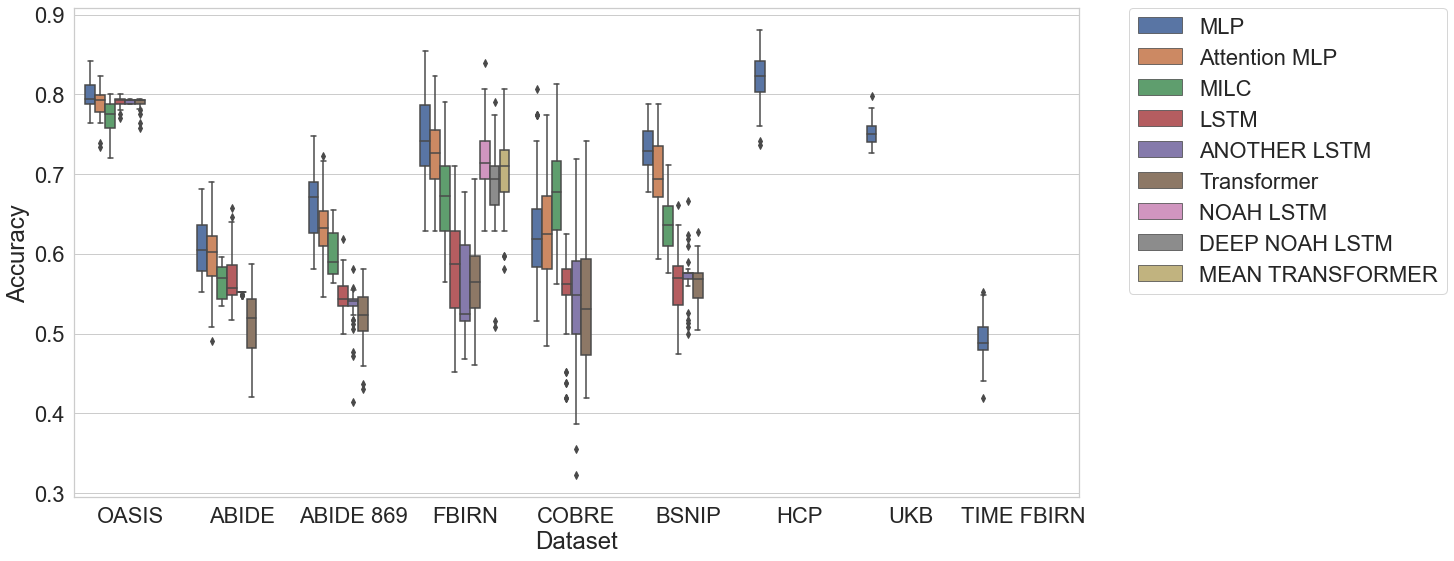

In [14]:
sns.boxplot(x="Dataset", y="Accuracy",
            hue="Model",
            data=data)
# sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig(
    "./images/all_acc.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)
plt.savefig(
    "./images/all_acc.svg",
    bbox_inches='tight',
)

## MLP architectures

In [ ]:
# WandB projects
proj_names = [
    "experiment-mlp-fbirn",
    "experiment-nores_mlp-fbirn",
    "experiment-trans_mlp-fbirn",
    "experiment-noens_mlp-fbirn",
]

In [15]:
data = pd.read_csv("./plots_data/MLP_arch_tests.csv")

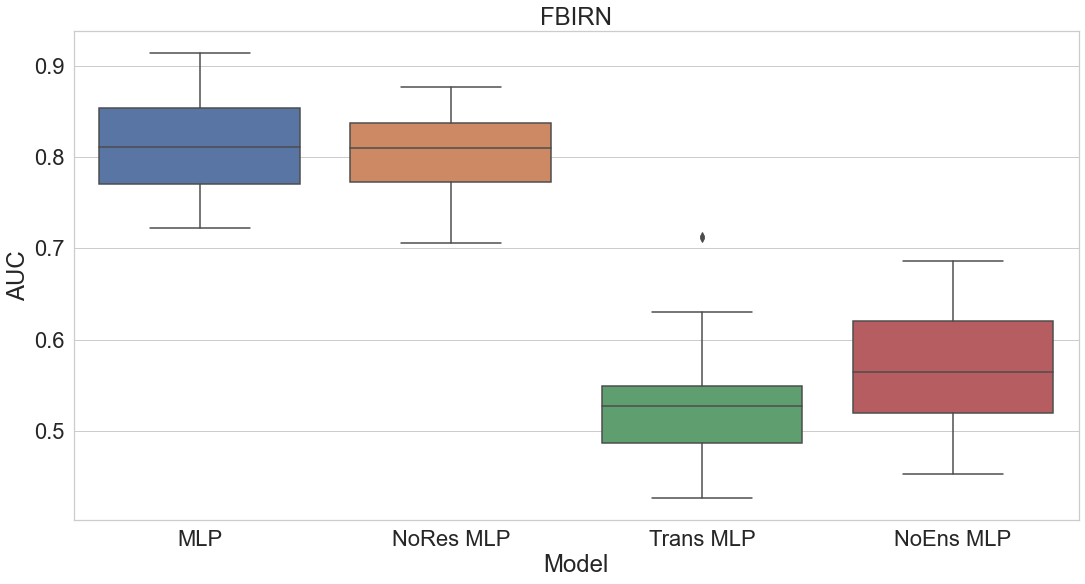

In [16]:
sns.boxplot(x="Model", y="AUC",
            data=data)
# sns.despine(offset=10, trim=True)
plt.title("FBIRN")

plt.savefig(
    "./images/MLP_arch_auc.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)
plt.savefig(
    "./images/MLP_arch_auc.svg",
    bbox_inches='tight',
)

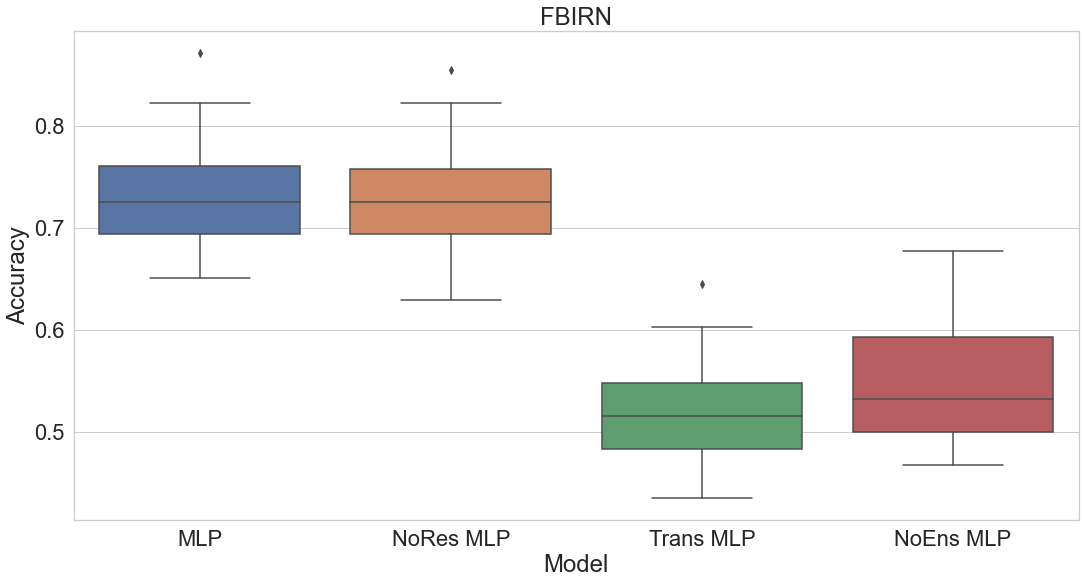

In [17]:
sns.boxplot(x="Model", y="Accuracy",
            data=data)
# sns.despine(offset=10, trim=True)
plt.title("FBIRN")

plt.savefig(
    "./images/MLP_arch_acc.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)
plt.savefig(
    "./images/MLP_arch_acc.svg",
    bbox_inches='tight',
)

## Cross-dataset experiments

In [ ]:
# WandB projects
proj_names = [
    ("220827.011216-experiment-mlp-fbirn-tests-cobre_bsnip_abide", "", "MLP"),
    ("220827.011216-experiment-mlp-fbirn-tests-cobre_bsnip_abide", "bsnip", "MLP"),
    ("220827.011216-experiment-mlp-fbirn-tests-cobre_bsnip_abide", "cobre", "MLP"),
    #
    ("220827.012730-experiment-mlp-bsnip-tests-fbirn_cobre", "", "MLP"),
    ("220827.012730-experiment-mlp-bsnip-tests-fbirn_cobre", "fbirn", "MLP"),
    ("220827.012730-experiment-mlp-bsnip-tests-fbirn_cobre", "cobre", "MLP"),
    #
    ("220827.014957-experiment-mlp-cobre-tests-fbirn_bsnip", "", "MLP"),
    ("220827.014957-experiment-mlp-cobre-tests-fbirn_bsnip", "fbirn", "MLP"),
    ("220827.014957-experiment-mlp-cobre-tests-fbirn_bsnip", "bsnip", "MLP"),
    # Fixed MILC
    ("newer-experiment-milc-fbirn", "", "MILC"),
    ("newer-experiment-milc-fbirn", "bsnip", "MILC"),
    ("newer-experiment-milc-fbirn", "cobre", "MILC"),
    #
    ("newer-experiment-milc-bsnip", "", "MILC"),
    ("newer-experiment-milc-bsnip", "fbirn", "MILC"),
    ("newer-experiment-milc-bsnip", "cobre", "MILC"),
    #
    ("newer-experiment-milc-cobre", "", "MILC"),
    ("newer-experiment-milc-cobre", "fbirn", "MILC"),
    ("newer-experiment-milc-cobre", "bsnip", "MILC"),
    # NPT MILC
    ("NPT-experiment-milc-fbirn", "", "NPT MILC"),
    ("NPT-experiment-milc-fbirn", "bsnip", "NPT MILC"),
    ("NPT-experiment-milc-fbirn", "cobre", "NPT MILC"),
    #
    ("NPT-experiment-milc-bsnip", "", "NPT MILC"),
    ("NPT-experiment-milc-bsnip", "fbirn", "NPT MILC"),
    ("NPT-experiment-milc-bsnip", "cobre", "NPT MILC"),
    #
    ("NPT-experiment-milc-cobre", "", "NPT MILC"),
    ("NPT-experiment-milc-cobre", "fbirn", "NPT MILC"),
    ("NPT-experiment-milc-cobre", "bsnip", "NPT MILC"),
]

In [18]:
data = pd.read_csv("./plots_data/cross_dataset_experiments.csv")

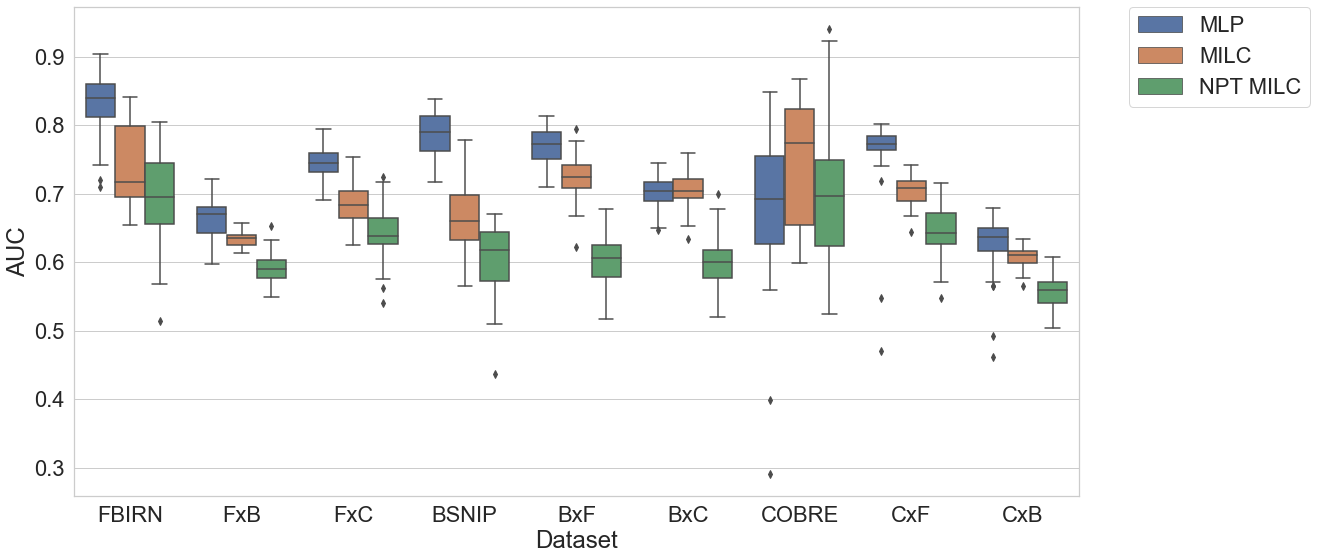

In [19]:
sns.boxplot(x="Dataset", y="AUC",
            hue="Model",
            data=data)
# sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig(
    "./images/cross_auc.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)

plt.savefig(
    "./images/cross_auc.svg",
    bbox_inches='tight',
)

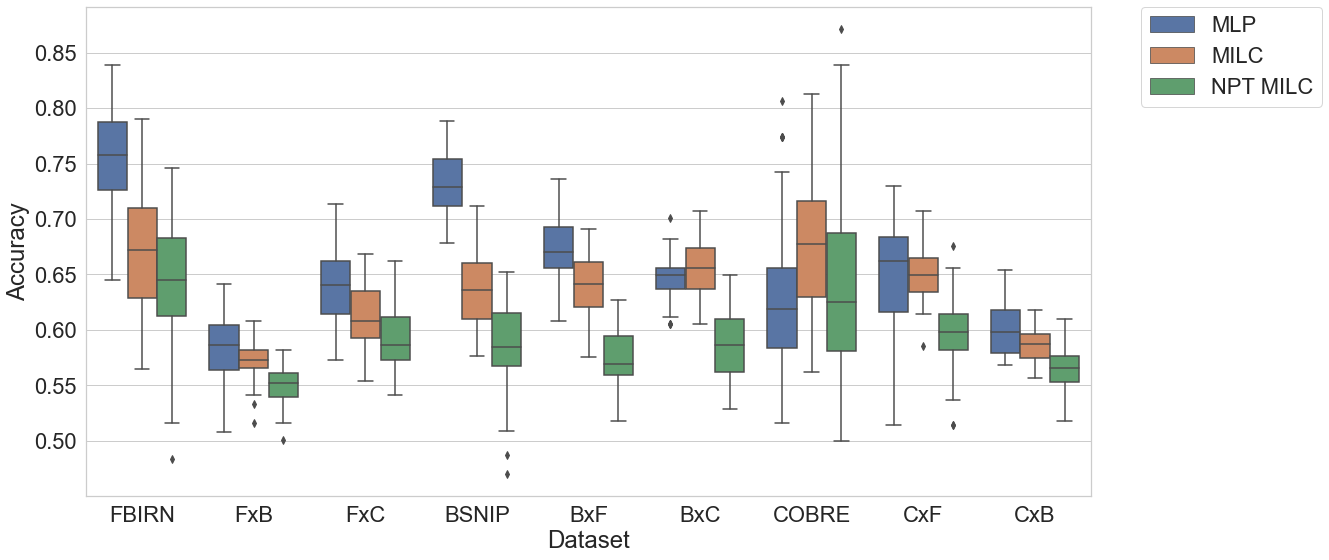

In [20]:
sns.boxplot(x="Dataset", y="Accuracy",
            hue="Model",
            data=data)
# sns.despine(offset=10, trim=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig(
    "./images/cross_acc.png",
    format="png",
    dpi=300,
    bbox_inches='tight',
)

plt.savefig(
    "./images/cross_acc.svg",
    bbox_inches='tight',
)

## ICA-ROI experiments

In [ ]:
# WandB projects
proj_names = [
    # MLP
    ("220827.011216-experiment-mlp-fbirn-tests-cobre_bsnip_abide", "FBIRN ICA"),
    ("221018.212243-experiment-mlp-fbirn_100", "FBIRN Schaefer 100"),
    ("221018.220806-experiment-mlp-fbirn_200", "FBIRN Schaefer 200"),
    ("221018.230636-experiment-mlp-fbirn_400", "FBIRN Schaefer 400"),
    ("221019.012758-experiment-mlp-fbirn_1000", "FBIRN Schaefer 1000"),
    # Wide MLP
    ("221024.223822-experiment-wide_mlp-fbirn", "FBIRN ICA"),
    ("221020.073358-experiment-wide_mlp-fbirn_100", "FBIRN Schaefer 100"),
    ("221020.095601-experiment-wide_mlp-fbirn_200", "FBIRN Schaefer 200"),
    ("221020.142405-experiment-wide_mlp-fbirn_400", "FBIRN Schaefer 400"),
    ("221020.233150-experiment-wide_mlp-fbirn_1000", "FBIRN Schaefer 1000"),
    # LSTM
    ("220817.225007-experiment-lstm-fbirn", "FBIRN ICA"),
    ("221021.183513-experiment-lstm-fbirn_100", "FBIRN Schaefer 100"),
    ("221022.012316-experiment-lstm-fbirn_200", "FBIRN Schaefer 200"),
    ("221022.062133-experiment-lstm-fbirn_400", "FBIRN Schaefer 400"),
    ("221023.065038-experiment-lstm-fbirn_1000", "FBIRN Schaefer 1000"),
    # Transformer
    ("220826.185919-experiment-transformer-fbirn", "FBIRN ICA"),
    ("221023.063324-experiment-transformer-fbirn_100", "FBIRN Schaefer 100"),
    ("221023.101246-experiment-transformer-fbirn_200", "FBIRN Schaefer 200"),
    ("221023.144808-experiment-transformer-fbirn_400", "FBIRN Schaefer 400"),
    ("221023.234336-experiment-transformer-fbirn_1000", "FBIRN Schaefer 1000"),
    # Other
    ("221019.112734-experiment-mlp-hcp_roi", "HCP Schaefer 200"),
    ("221021.065816-experiment-mlp-hcp", "HCP ICA"),
    ("221019.144727-experiment-mlp-abide_roi", "Abide 871 Schaefer 200"),
    ("220811.190848-experiment-mlp-abide", "Abide 569 ICA"),
    ("220811.221744-experiment-mlp-abide_869", "Abide 869 ICA"),
]

In [35]:
data = pd.read_csv("./plots_data/ICA_ROI_data.csv")

fbirn_data = data[data.Dataset.str.startswith("FBIRN")]
other_data = data[~data.Dataset.str.startswith("FBIRN")]

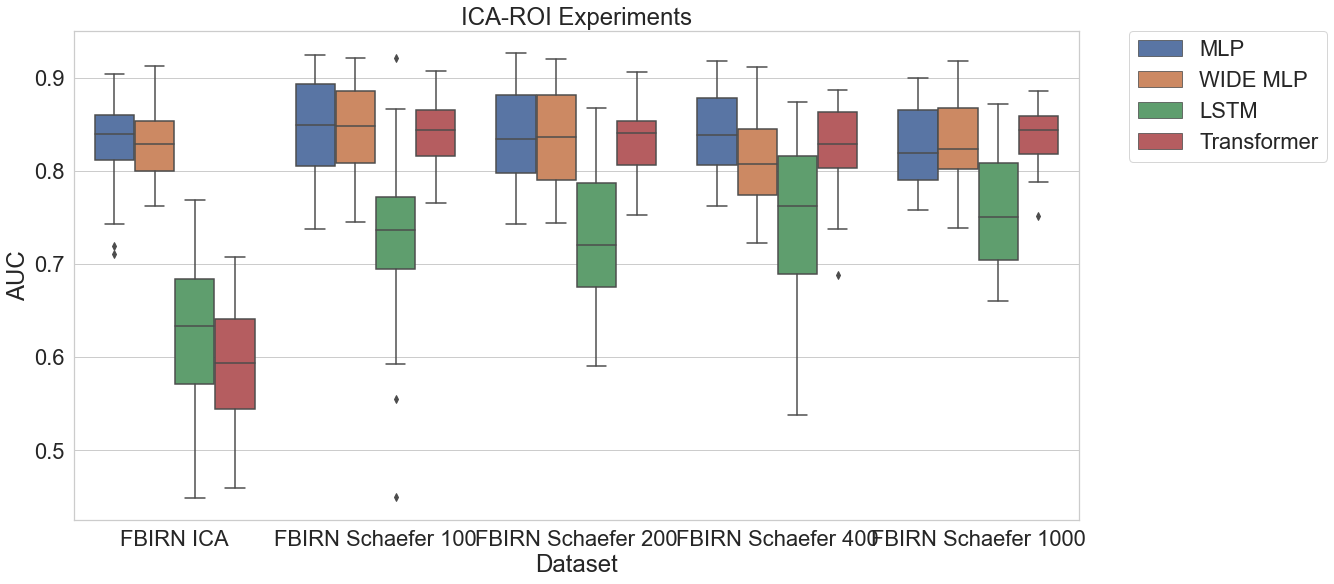

In [36]:
sns.boxplot(x="Dataset", y="AUC",
            data=fbirn_data,
            hue="Model"
            )
# sns.despine(offset=10, trim=True)
plt.title("ICA-ROI Experiments")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig(
    "./images/ICA-ROI_fbirn_auc.png", 
    format="png",
    dpi=300,
    bbox_inches='tight'
)
plt.savefig("./images/ICA-ROI_fbirn_auc.svg", bbox_inches='tight')

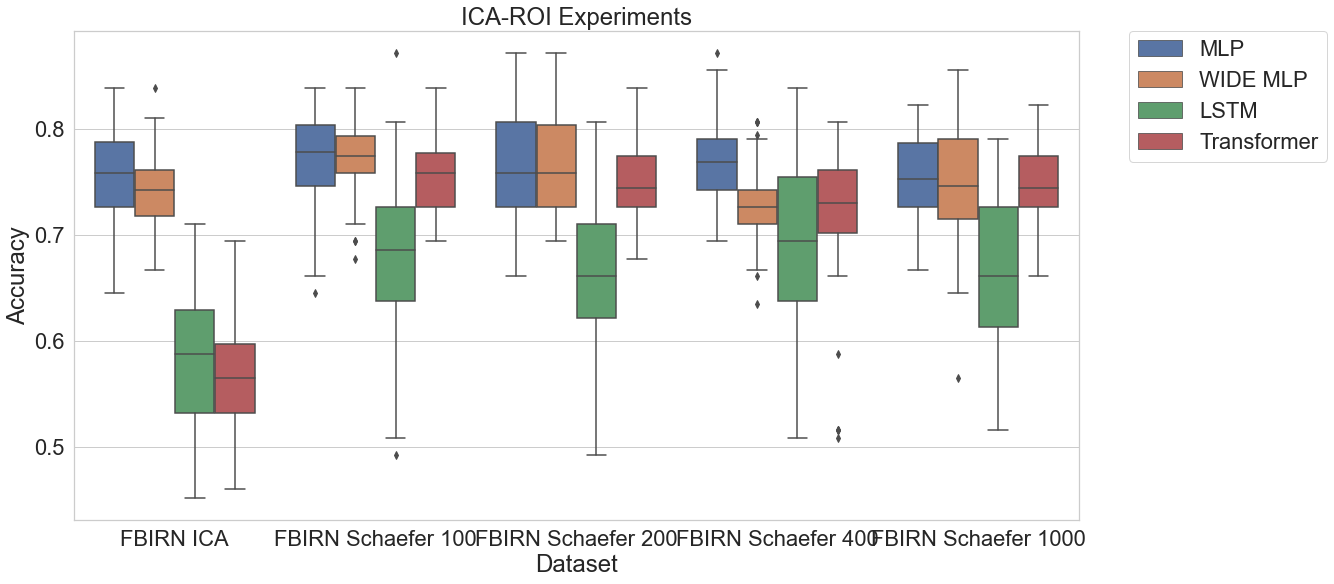

In [37]:
sns.boxplot(x="Dataset", y="Accuracy",
            data=fbirn_data,
            hue="Model"
            )
# sns.despine(offset=10, trim=True)
plt.title("ICA-ROI Experiments")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig(
    "./images/ICA-ROI_fbirn_acc.png", 
    format="png",
    dpi=300,
    bbox_inches='tight'
)
plt.savefig("./images/ICA-ROI_fbirn_acc.svg", bbox_inches='tight')

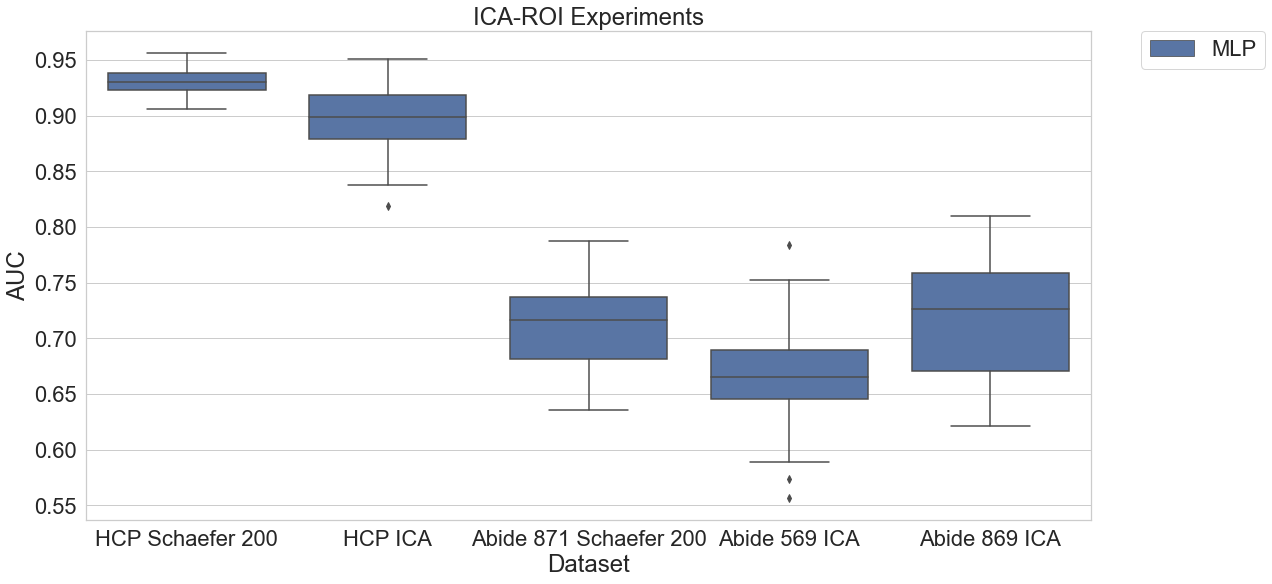

In [38]:
sns.boxplot(x="Dataset", y="AUC",
            data=other_data,
            hue="Model"
            )
# sns.despine(offset=10, trim=True)
plt.title("ICA-ROI Experiments")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig(
    "./images/ICA-ROI_other_auc.png", 
    format="png",
    dpi=300,
    bbox_inches='tight'
)
plt.savefig("./images/ICA-ROI_other_auc.svg", bbox_inches='tight')

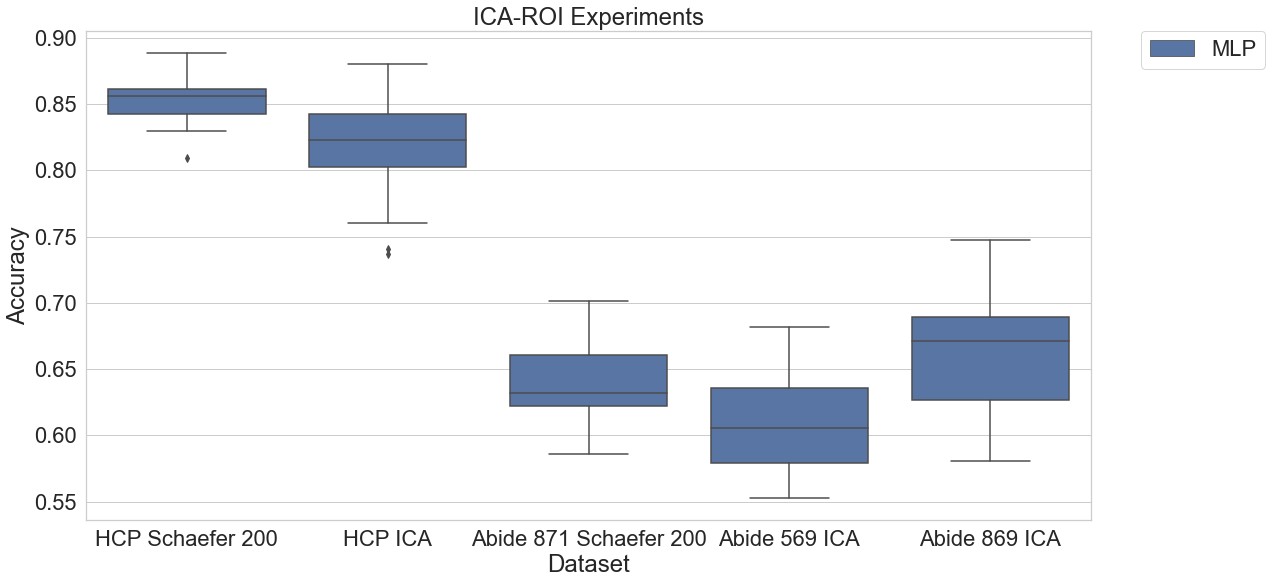

In [39]:
sns.boxplot(x="Dataset", y="Accuracy",
            data=other_data,
            hue="Model"
            )
# sns.despine(offset=10, trim=True)
plt.title("ICA-ROI Experiments")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig(
    "./images/ICA-ROI_other_acc.png", 
    format="png",
    dpi=300,
    bbox_inches='tight'
)
plt.savefig("./images/ICA-ROI_other_acc.svg", bbox_inches='tight')